# How to use iterative imputer

In [1]:
# first load the data set and replace the missing data with Nan and 
# find the percentage of missing data for each column.

from pandas import read_csv 
# load the dataset
data=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\horse-colic.csv', header=None, na_values='?')
#  get information about about the dataset
print(data.head())

# get info about the rows with missing values for each column
for i in range(data.shape[1]):
    # count the no. of missing values for each column
    n_miss=data[[i]].isnull().sum()
    percent=n_miss/data.shape[0] * 100
    print(i, n_miss, percent)

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
0 0    1
dtype: int64 0    0.333333
dtype: float64
1 1    0
dtype: int64 1    0.0
dtype: float64
2 2    0
dtype: int64 2    0.0
dtype: float64
3 3    60
dtype: int64 3    20.0
dtype: float64
4 4    24
dtype: int64 4    8.0
dtype: float64
5 5    58
dt

# Iterative imputation with iterative imputer

In [3]:
# for this we are using Iterative imputer from scikit learn library

from pandas import read_csv
from numpy import isnan
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# load the data
ds=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\horse-colic.csv', header=None, na_values='?')
#split into input and output elements
data=ds.values
ix=[i for i in range(data.shape[1]) if i !=23]
x, y= data[:, ix], data[:, 23]

# summarize total missing values
print(sum(isnan(x).flatten()))

# define imputer
imputer=IterativeImputer()
# fit the imputer
imputer.fit(x)
# tranform the dataset
xtrans=imputer.transform(x)

# finally find the missing values
print(sum(isnan(xtrans).flatten()))

1605
0


In [4]:
### iterative imputer and model evaluation

In [5]:
# in this section we will use k fold cross validation and pipeline class to train the train and test datasets and finding the accuracy.

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load the data
ds=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\horse-colic.csv', header=None, na_values='?')
#split into input and output elements
data=ds.values
ix=[i for i in range(data.shape[1]) if i !=23]
x, y= data[:, ix], data[:, 23]

# define modeling pipeline
model= RandomForestClassifier()
imputer=IterativeImputer()
pipeline=Pipeline(steps=[('i', imputer), ('m', model)])

#define model evaluation
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores=cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print(mean(scores), std(scores))

0.8699999999999998 0.053989024947805955


In [ ]:
#### iterative imputer with different imputation

ascending 0.8688888888888889 0.053008268630562495
descending 0.8644444444444445 0.053008268630562495
roman 0.8755555555555555 0.05086899174337598
arabic 0.8677777777777778 0.054080415660613126
random 0.8722222222222221 0.053805777834681094


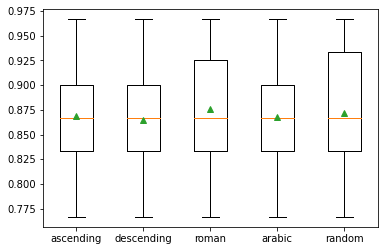

In [7]:
from numpy import std
from numpy import mean
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load the data
ds=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\horse-colic.csv', header=None, na_values='?')
#split into input and output elements
data=ds.values
ix=[i for i in range(data.shape[1]) if i !=23]
x, y= data[:, ix], data[:, 23]

# evaluate each statistics on the dataset
results=list()
strategies=['ascending', 'descending', 'roman', 'arabic','random']
for s in strategies:
    # create the modeling pipeline
    pipeline=Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])
    # evaluat the model
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores=cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    #store results
    results.append(scores)
    print(s, mean(scores), std(scores))
    
# plot box plot for comparison which is better
pyplot.boxplot(results, labels=strategies, showmeans= True)
pyplot.show()
    

In [8]:
#### itarative imputer and different number of imputation

1 0.8711111111111111 0.051448164012400995
2 0.8666666666666666 0.05510931896727664
3 0.8722222222222222 0.053805777834681094
4 0.8711111111111111 0.05216308708580222
5 0.87 0.055344041801832305
6 0.871111111111111 0.053564314636417545
7 0.8633333333333333 0.05259911279353166
8 0.8777777777777779 0.05665577237325315
9 0.8733333333333333 0.05047918529600242
10 0.8666666666666667 0.05374838498865698
11 0.87 0.05189019746149162
12 0.8699999999999999 0.05189019746149162
13 0.8711111111111112 0.053564314636417545
14 0.8711111111111112 0.04924115512480075
15 0.8677777777777779 0.04511986778721544
16 0.8677777777777778 0.054080415660613126
17 0.8755555555555556 0.05013561854523768
18 0.8666666666666667 0.054433105395181716
19 0.8777777777777778 0.05187830013301667
20 0.8777777777777779 0.05328701692569687


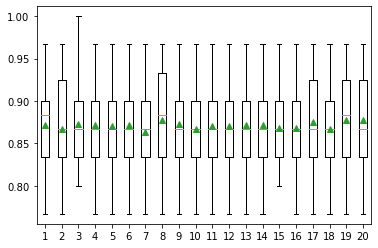

In [9]:
from numpy import std
from numpy import mean
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load the data
ds=read_csv(r'C:\Users\Kumari Sapna\Desktop\python notebooks files\Data Preparation\Datasets\horse-colic.csv', header=None, na_values='?')
#split into input and output elements
data=ds.values
ix=[i for i in range(data.shape[1]) if i !=23]
x, y= data[:, ix], data[:, 23]

# evaluate each statistics on the dataset
results=list()
strategies=[str(i) for i in range (1,21)]
for s in strategies:
    # create the modeling pipeline
    pipeline=Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m', RandomForestClassifier())])
    # evaluat the model
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores=cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    #store results
    results.append(scores)
    print(s, mean(scores), std(scores))
    
# plot box plot for comparison which is better
pyplot.boxplot(results, labels=strategies, showmeans= True)
pyplot.show()
    